# CNN Model to classify Skin Cancer types - Surobhi Deb

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [2]:
#from google.colab import drive

#drive.mount('/content/gdrive')
#root_path = 'gdrive/My Drive/CNN_Dataset/'  #change dir to your project folder

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
root_dir = 'C:/iiitb/Week 26 - CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_dir+'/Train')
data_dir_test = pathlib.Path(root_dir+'/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Creating datasets

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Using 80% of the images for training, and 20% for validation.

#### Creating the training dataset

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='int')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Creating the Validation dataset

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='int')

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# Listing out all the classes of skin cancer and store them in a list. 

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


There are 2239 images in the Training set and 118 images in the Test Set. <br>
The Training set is further split in the ratio of 80:20 for Training and Validation.<br>
That splits them into 1792 and 447 images.

### Visualize the data

Visualizing 1 image from each class of the training dataset.

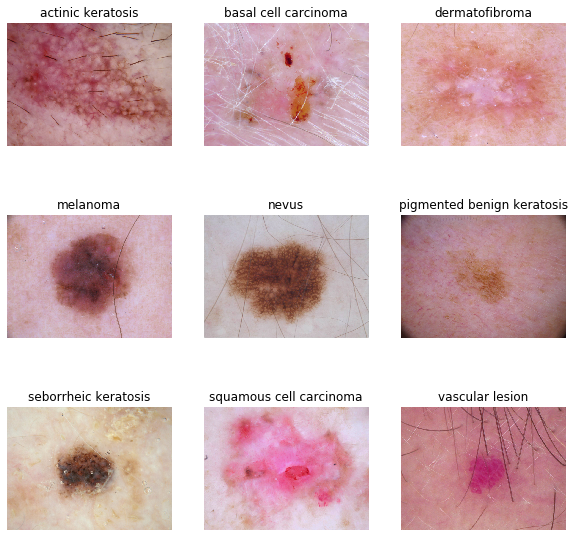

In [9]:
import matplotlib.image as mpimg

plt.figure(figsize =(10,10))
for index,name in enumerate(class_names):
  ax = plt.subplot(3,3,index+1)
  images = list(data_dir_train.glob(name +'/*'))
  img = mpimg.imread((str(images[0])))
  plt.imshow(img)
  plt.title(name)
  plt.axis('off')

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 1: With the raw data
#### Creating a CNN model, which can accurately detect 9 classes present in the dataset. 

The model consists of two convolution blocks with a max pool layer in each of them. Each of these layers is activated by a relu function. We flatten the output from the max pool layer before feeding them into the dense layers. There's a fully connected layer with 128 units on top of it that is activated by a softmax activation function. 
Softmax activation function gives the best results for multi- class classification and hence using the same.

We will normalize the data in the model.

In [13]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
])

### Compile the model


In [14]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 536s 2s/step - loss: 3.8708 - accuracy: 0.1873 - val_loss: 2.0365 - val_accuracy: 0.2835
Epoch 2/20
57/57 [==============================] - 2s 31ms/step - loss: 1.9571 - accuracy: 0.2973 - val_loss: 1.9695 - val_accuracy: 0.3683
Epoch 3/20
57/57 [==============================] - 2s 31ms/step - loss: 1.8464 - accuracy: 0.3784 - val_loss: 1.7039 - val_accuracy: 0.3862
Epoch 4/20
57/57 [==============================] - 2s 31ms/step - loss: 1.6888 - accuracy: 0.4073 - val_loss: 1.5821 - val_accuracy: 0.4241
Epoch 5/20
57/57 [==============================] - 2s 31ms/step - loss: 1.4689 - accuracy: 0.5126 - val_loss: 1.5342 - val_accuracy: 0.4464
Epoch 6/20
57/57 [==============================] - 2s 31ms/step - loss: 1.3946 - accuracy: 0.5309 - val_loss: 1.4805 - val_accuracy: 0.4911
Epoch 7/20
57/57 [==============================] - 2s 31ms/step - loss: 1.2420 - accuracy: 0.5698 - val_loss: 1.3810 - val_accuracy: 0.5067
Epoch 8/20
57

### Visualizing training results

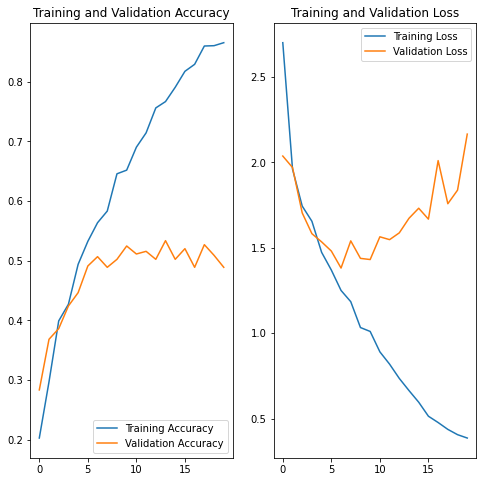

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings from the Model

Here are the findings from the results :-<br>
- The training accuracy steadily increases with each epoch and at the end of 20 epochs it peaks at ~88% <br>
- The Training loss decreases steadily with each epoch <br>
- The Validation accuracy initially increases but after around 5 epochs oscillates around +/- 50% <br>
- The Validation Loss decreases initially but shows an upward trend after 5 epochs <br>

From this observations, we can clearly say that the model is *over-fitting* on the data. <br>

To overcome this we will apply two strategies here : <br>

1. **Augmentation** - Try Rotating/Zooming/Flipping the images and check if the over-fitting exists <br>
2. **Class Imbalance** -- Address the class imbalance issue by adding additional images to each class.

### Model 2 : Data Augmentation

We will try a few transformations in the dataset and run the model with this. <br>

Here are the transformations : <br>
1. Flip the image Horizontally <br>
2. A slight random rotation of the image <br>
3. Zoom the images slighly

In [10]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize how the image looks in each cycle of the augmentation to understand the effect the augmentation has on the image.

C:\Users\Surobhi\anaconda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


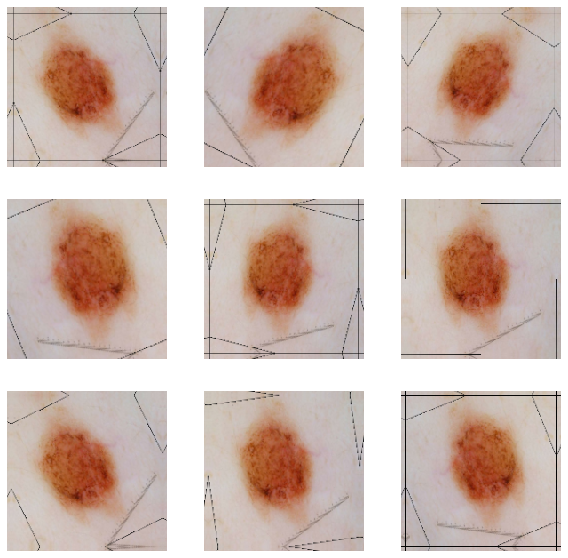

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

We will use the same model as above. The only addition will be few *dropout layers* in between.<br>
We are hoping that these dropout layers will help reduce the over-fitting in the model.

### Model 2 : With Augmented data

In [20]:
model = Sequential([
  data_augmentation,                  
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(9, activation='softmax')
])

### Compiling the model

In [21]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 64)       

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 3s 43ms/step - loss: 8.3639 - accuracy: 0.1446 - val_loss: 2.1826 - val_accuracy: 0.1964
Epoch 2/20
57/57 [==============================] - 2s 40ms/step - loss: 2.0658 - accuracy: 0.2173 - val_loss: 2.0760 - val_accuracy: 0.2188
Epoch 3/20
57/57 [==============================] - 2s 40ms/step - loss: 1.9700 - accuracy: 0.2761 - val_loss: 1.9246 - val_accuracy: 0.3058
Epoch 4/20
57/57 [==============================] - 2s 40ms/step - loss: 1.8467 - accuracy: 0.3494 - val_loss: 1.9156 - val_accuracy: 0.3728
Epoch 5/20
57/57 [==============================] - 2s 40ms/step - loss: 1.7481 - accuracy: 0.3802 - val_loss: 1.6825 - val_accuracy: 0.4308
Epoch 6/20
57/57 [==============================] - 2s 40ms/step - loss: 1.6214 - accuracy: 0.4273 - val_loss: 1.5560 - val_accuracy: 0.4353
Epoch 7/20
57/57 [==============================] - 2s 41ms/step - loss: 1.5804 - accuracy: 0.4430 - val_loss: 1.7493 - val_accuracy: 0.3817
Epoch 8/20
57

### Visualizing the results

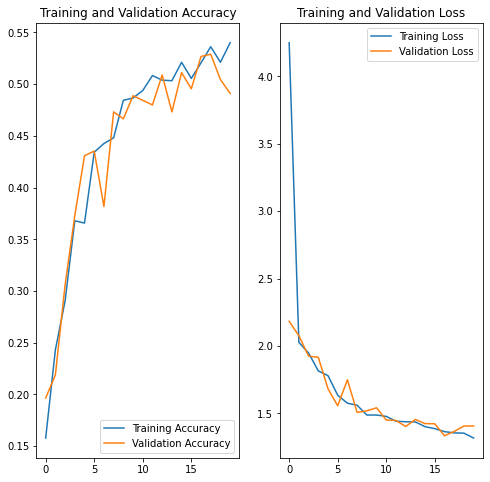

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings from the Model

Here are the findings from the second model :
1. There is a significant drop in the Training error rate. Earlier the training rate touched ~90% but in this model the accuracy dropped to ~53%.
2. The training loss is gradually decreasing and is lessor in absolute values than the first model.
3. There is not much improvement in the validation accuracy compared to previous.
4. The Validation losses are much lesser.

Hence, we can safely conclude that the *problem of over-fitting* has been completely mitigated here. But this has cost us a significant drop in the accuracy levels. We will addres that in our third model.

#### Plotting  Class Distribution in the training dataset

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [11]:
import glob as glob
data_dir= root_dir +'/Train'
#data_dir='C:/iiitb/Week 26 - CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
path_list = [x for x in glob.glob(os.path.join(data_dir, '*','*.jpg'))]

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]

dataframe_dict = dict(zip(path_list, lesion_list))

original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

Plotting the same on a Bar Chart.

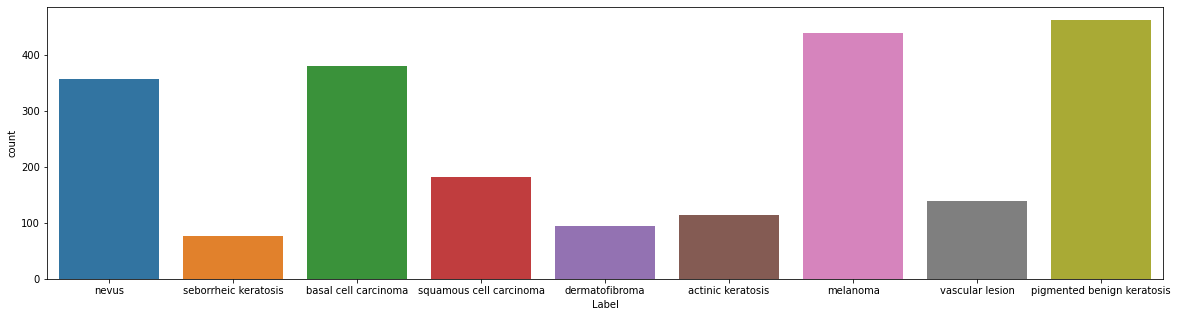

In [28]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x="Label",data = original_df)
plt.show()

####  Write your findings here: 
####  Which class has the least number of samples?

The class 'seborrheic keratosis' has the least number of samples. <br>
It has only 77 images in it.

#### Which classes dominate the data in terms proportionate number of samples?

'pigmented benign keratosis' is the class that has the maximum number of samples. <br>
It has 462 samples.


## Model 3: Rectifying the Class Imbalance

We will use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In our case , we will add 500 samples per class to make sure that none of the classes are sparse.

In [32]:
path_to_training_dataset = root_dir+'/Train/'
#path_to_training_dataset="gdrive/My Drive/CNN_Dataset/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAFCB8A6450>: 100%|██████████| 500/500 [00:18<00:00, 27.43 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 379 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAFCB9725D0>: 100%|██████████| 500/500 [00:18<00:00, 27.78 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAFCB8E0F50>: 100%|██████████| 500/500 [00:18<00:00, 26.46 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3008x2000 at 0x7FAFCB91B350>: 100%|██████████| 500/500 [01:20<00:00,  6.18 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAFD4049890>:   0%|          | 1/500 [00:00<00:55,  8.94 Samples/s]

Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FAFCB924A90>: 100%|██████████| 500/500 [01:22<00:00,  6.06 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAFCB8B3490>: 100%|██████████| 500/500 [00:18<00:00, 26.73 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FB0348B5250>: 100%|██████████| 500/500 [00:42<00:00, 11.86 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB034AABED0>: 100%|██████████| 500/500 [00:18<00:00, 26.71 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB0349E1E10>: 100%|██████████| 500/500 [00:18<00:00, 26.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [13]:
data_dir_train = pathlib.Path(root_dir+'/Train')

In [14]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Let's see the distribution of augmented data after adding new images to the original training data.

In [15]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [16]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [17]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [18]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [19]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

Plotting the same on a bar chart.

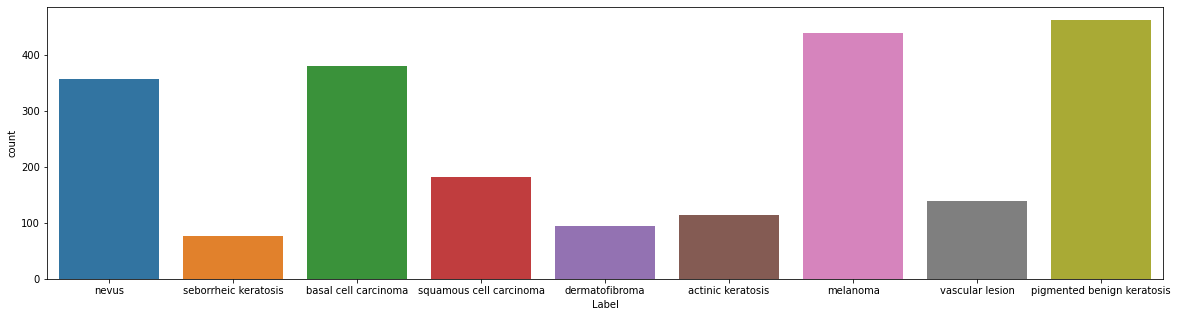

In [42]:
plt.figure(figsize=(20,5))
sns.countplot(x="Label",data = original_df)
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

Training the model on the data created using Augmentor

In [43]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [46]:
data_dir_train = pathlib.Path(root_dir+'/Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='int')

Found 6742 files belonging to 9 classes.
Using 5394 files for training.


#### Creating a validation dataset

In [47]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='int')

Found 6742 files belonging to 9 classes.
Using 1348 files for validation.


#### Model 3 : With the Class-Balance Data

In [48]:
model = Sequential([               
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(9, activation='softmax')
])

#### Compiling the model

In [49]:
## your code goes here
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 45, 45, 64)       

####  Let's train the model

In [51]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 41s 236ms/step - loss: 4.3054 - accuracy: 0.1436 - val_loss: 2.0123 - val_accuracy: 0.3205
Epoch 2/30
169/169 [==============================] - 41s 235ms/step - loss: 1.8615 - accuracy: 0.2837 - val_loss: 1.6788 - val_accuracy: 0.3672
Epoch 3/30
169/169 [==============================] - 41s 236ms/step - loss: 1.5794 - accuracy: 0.4031 - val_loss: 1.7163 - val_accuracy: 0.3501
Epoch 4/30
169/169 [==============================] - 41s 235ms/step - loss: 1.4740 - accuracy: 0.4384 - val_loss: 1.4076 - val_accuracy: 0.4674
Epoch 5/30
169/169 [==============================] - 41s 236ms/step - loss: 1.3390 - accuracy: 0.4953 - val_loss: 1.3303 - val_accuracy: 0.5111
Epoch 6/30
169/169 [==============================] - 40s 232ms/step - loss: 1.2717 - accuracy: 0.5309 - val_loss: 1.2155 - val_accuracy: 0.5490
Epoch 7/30
169/169 [==============================] - 40s 232ms/step - loss: 1.1212 - accuracy: 0.5776 - val_loss: 1.1449 - val_ac

#### **Todo:**  Visualize the model results

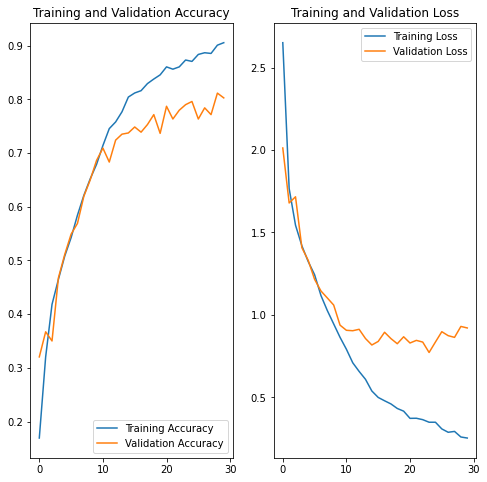

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Did you get rid of underfitting/overfitting? Did class rebalance help?



We reached a training accuracy of 90% and a validation accuracy of 80%. The Validation Accuracy has improved considerably and the gap between the training and validation accuracy has got bridged, and it stands at only 10% now.<br>

We can conclude that doing the class rebalance has helped in reducing the over-fitting in the model that existed in the previous model and has improved the accuracy considerably. However, there is a slight over-fit in the model still existing. 